In [ ]:
import time
import numpy as np

# Define the size of the matrix
N = 4096

# Create two random NxN matrices
A = np.random.rand(N, N).astype(np.float32)
B = np.random.rand(N, N).astype(np.float32)

# Warm-up
C = np.dot(A, B)

# Measure time
start = time.time()
C = np.dot(A, B)
end = time.time()

# Calculate FLOP/s
flops = 2 * N**3 / (end - start)
print(f"Estimated Peak FLOP/s: {flops / 1e12} TFLOP/s")


Estimated Peak FLOP/s: 0.019918569565629984 TFLOP/s


In [ ]:
import time

# Define the size of the array
N = 100000000

# Create a random array
A = np.random.rand(N).astype(np.float32)
B = np.empty_like(A)

# Warm-up
np.copyto(B, A)

# Measure time
start = time.time()
np.copyto(B, A)
end = time.time()

# Calculate memory bandwidth
size_in_bytes = A.size * A.itemsize
bandwidth = size_in_bytes / (end - start) / 1e9
print(f"Estimated Memory Bandwidth: {bandwidth} GB/s")


Estimated Memory Bandwidth: 4.8513460526391885 GB/s


switching to GPU

In [ ]:
import tensorflow as tf
import time

# Define the size of the matrix
N = 4096

# Create two random NxN matrices
A = tf.random.uniform([N, N], dtype=tf.float32)
B = tf.random.uniform([N, N], dtype=tf.float32)

# Warm-up
C = tf.linalg.matmul(A, B)

# Measure time
start = time.time()
C = tf.linalg.matmul(A, B)
end = time.time()

# Calculate FLOP/s
flops = 2 * N**3 / (end - start)
print(f"Estimated Peak FLOP/s (GPU): {flops / 1e12} TFLOP/s")


Estimated Peak FLOP/s (GPU): 139.41009729224268 TFLOP/s


In [ ]:
import tensorflow as tf
import time

# Define the size of the array
N = 100000000

# Create a random array
A = tf.random.uniform([N], dtype=tf.float32)
B = tf.Variable(tf.zeros_like(A))

# Warm-up
B.assign(A)

# Measure time
start = time.time()
B.assign(A)
end = time.time()

# Calculate memory bandwidth
size_in_bytes = A.shape[0] * A.dtype.size
bandwidth = size_in_bytes / (end - start) / 1e9
print(f"Estimated Memory Bandwidth (GPU): {bandwidth} GB/s")


Estimated Memory Bandwidth (GPU): 974.286643437863 GB/s


Switching to TPU

In [4]:
import tensorflow as tf
import time

# Define the size of the matrix
N = 4096

# Create two random NxN matrices
A = tf.random.uniform([N, N], dtype=tf.float32)
B = tf.random.uniform([N, N], dtype=tf.float32)

# Warm-up
C = tf.linalg.matmul(A, B)

# Measure time
start = time.time()
C = tf.linalg.matmul(A, B)
end = time.time()

# Calculate FLOP/s
flops = 2 * N**3 / (end - start)
print(f"Estimated Peak FLOP/s (GPU): {flops / 1e12} TFLOP/s")


Estimated Peak FLOP/s (GPU): 2.4351391579438824 TFLOP/s


In [3]:
import tensorflow as tf
import time

# Define the size of the array
N = 100000000

# Create a random array
A = tf.random.uniform([N], dtype=tf.float32)
B = tf.Variable(tf.zeros_like(A))

# Warm-up
B.assign(A)

# Measure time
start = time.time()
B.assign(A)
end = time.time()

# Calculate memory bandwidth
size_in_bytes = A.shape[0] * A.dtype.size
bandwidth = size_in_bytes / (end - start) / 1e9
print(f"Estimated Memory Bandwidth (GPU): {bandwidth} GB/s")

Estimated Memory Bandwidth (GPU): 1393.4564784053157 GB/s


Using publicly available Peak performance and peak memory bandwidth

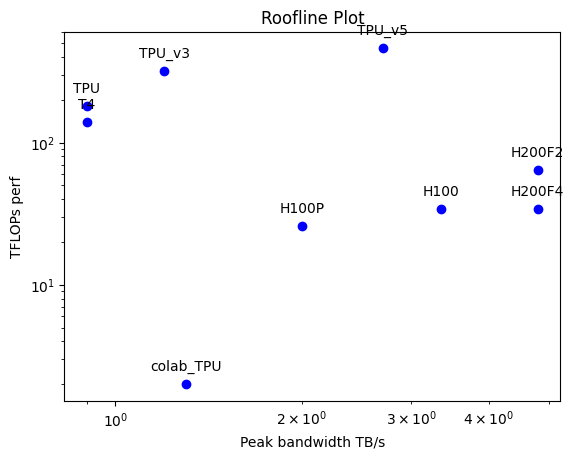

In [13]:
import matplotlib.pyplot as plt

# Your data
flops_per_sec = [139,2, 34, 64, 180, 320, 459, 34, 26]
peak_BW = [ 0.9, 1.3, 4.8, 4.8, 0.9, 1.2, 2.7, 3.35,2]
labels = [ 'T4', 'colab_TPU', 'H200F4', 'H200F2', 'TPU', 'TPU_v3', 'TPU_v5', 'H100', 'H100P']
# Create a new figure
plt.figure()

# Plot x vs y with a logarithmic scale on the y-axis
plt.scatter(peak_BW, flops_per_sec, marker='o', color='b', label='TFLOPs vs peak BW')

# Set the x and y scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Add labels and a title
plt.ylabel('TFLOPs perf')
plt.xlabel('Peak bandwidth TB/s')
plt.title('Roofline Plot')

# Annotate each point with its custom label
for x, y, label in zip(peak_BW, flops_per_sec, labels):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add a legend
#plt.legend()

# Show the plot
plt.show()


*sources*

https://www.nvidia.com/en-us/data-center/h100/

https://www.nvidia.com/en-us/data-center/h200/

https://en.wikipedia.org/wiki/Tensor_Processing_Unit
